In [1]:
import pandas as pd
import numpy as np
from juanFunciones import *

In [6]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 "sku" : "category", 
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category",
    "os" : "category",
    "model_brand": "category",
    "label":"category"
}

In [7]:
df = pd.read_csv("trainDF.csv", parse_dates=["timestamp"], dtype=types).rename(columns={"Unnamed: 0": "index"})

## Los usuarios en Label Conviertieron o no en la fecha del 1/6 al 15/6 
No quiere decir que no hayan convertido antes, sino que se sabe que convirtieron en esa fecha

In [81]:
labels = pd.read_csv("all/labels_training_set.csv")

chequeo que todos las personas del evento estan en el training

In [84]:
(df.person.isin(labels.person.values) == False).any()

0

---
dfC son los que convirtieron
dfNC los que se sabe que no convirtieron

In [112]:
dfC = df[df["label"] == 1]
dfNC = df[df["label"] == 0]

In [99]:
"Porcentaje de Conversiones {:.2}%".format(dfC.size *100 / df.size)

'Porcentaje de Conversiones 8.5%'

In [117]:
(dfC.event.value_counts(normalize=True) / dfNC.event.value_counts(normalize=True)).sort_values(ascending=False)

lead                 1.540649
conversion           1.499239
brand listing        1.262225
staticpage           1.249318
generic listing      1.134631
visited site         1.028348
viewed product       1.005079
searched products    0.939890
search engine hit    0.886362
ad campaign hit      0.743618
checkout             0.628734
Name: event, dtype: float64

Se ve que los usuarios que mas convirtieron lo siguieron haciendo?? 
a, sorprende que lead o brand listing esten arriba, o siquiera static page
Que se entre por ad campaign hit o search products habla que compran mas los que entran por la url directo. Quizas porque en lead estan esperando el producto y les entro en esa fecha

In [127]:
dfNC[dfNC.event == "conversion"]

index           timestamp       event    person  url      sku  \
301         744 2018-05-29 07:13:30  conversion  380c0e60  NaN   6314.0   
1673       3263 2018-05-29 17:20:21  conversion  576d1af6  NaN   2741.0   
2098       3971 2018-05-29 15:12:22  conversion  ba83de34  NaN   8302.0   
2398       4512 2018-05-29 15:02:36  conversion  f64d2771  NaN   8415.0   
2568       4832 2018-05-29 14:13:45  conversion  aafb01b8  NaN  10883.0   
3546       6681 2018-05-19 22:41:05  conversion  d96c40d3  NaN   9300.0   
3606       6777 2018-05-19 22:37:16  conversion  8eb9c436  NaN   6371.0   
3883       7286 2018-05-19 23:08:40  conversion  7fb6d411  NaN  10953.0   
3924       7359 2018-05-19 23:03:17  conversion  8eb9c436  NaN   6371.0   
4010       7516 2018-05-19 22:31:54  conversion  8eb9c436  NaN   6371.0   
4523       8529 2018-05-19 23:14:40  conversion  0c3fb871  NaN   2820.0   
4772       9073 2018-05-19 13:04:50  conversion  ebcf8cda  NaN   8541.0   
6108      11730 2018-05-30 14:57:08  conversion  e17bd9f9  NaN   2750.0   
6806      13293 2018-05-30 15:00:49  conversion  e17bd9f9  NaN   2820.0   
6904      13494 2018-05-30 22:02:44  conversion  631f3461  NaN  10113.0   
7153      13987 2018-05-30 22:56:35  conversion  23ab4a45  NaN    725.0   
7278      14248 2018-05-30 18:03:27  conversion  c974c674  NaN   9288.0   
7579      14957 2018-05-30 17:38:46  conversion  c974c674  NaN   8525.0   
7598      15000 2018-05-30 17:51:27  conversion  94042208  NaN   3287.0   
7774      15413 2018-05-30 18:17:38  conversion  94042208  NaN   3287.0   
7856      15616 2018-05-30 17:45:02  conversion  c974c674  NaN   9274.0   
7927      15767 2018-05-30 17:34:20  conversion  150b08ea  NaN    283.0   
8143      16233 2018-05-30 17:06:07  conversion  94042208  NaN   3287.0   
8169      16291 2018-05-30 17:09:35  conversion  3875c058  NaN  12549.0   
8198      16342 2018-05-30 15:38:46  conversion  e17bd9f9  NaN   2820.0   
8301      16557 2018-05-15 14:37:16  conversion  e5d4b8db  NaN   6371.0   
8337      16605 2018-05-15 15:12:57  conversion  2ace6a2c  NaN   2766.0   
8488      16845 2018-05-15 15:32:52  conversion  740cb9a9  NaN   6371.0   
8527      16939 2018-05-15 16:00:14  conversion  8eb5ee11  NaN   9358.0   
8754      17404 2018-05-15 16:36:33  conversion  e895f879  NaN  10953.0   
...         ...                 ...         ...       ...  ...      ...   
869574  1733723 2018-03-08 11:02:43  conversion  fb5d711b  NaN  12464.0   
869706  1733982 2018-03-08 21:02:33  conversion  fb5d711b  NaN    506.0   
869766  1734100 2018-03-08 10:05:17  conversion  fb5d711b  NaN    506.0   
870962  1736312 2018-04-10 19:08:16  conversion  16a36d4c  NaN    284.0   
871276  1736791 2018-04-10 01:24:30  conversion  ff28a233  NaN   6341.0   
871449  1737026 2018-04-10 23:29:35  conversion  91979723  NaN   9678.0   
871768  1737543 2018-03-29 09:34:35  conversion  59e1e831  NaN   8260.0   
872166  1738271 2018-03-29 20:03:22  conversion  31582aff  NaN   1405.0   
872368  1738699 2018-02-10 23:28:28  conversion  9e51c806  NaN    276.0   
872374  1738707 2018-02-10 23:10:20  conversion  9e51c806  NaN    276.0   
872403  1738743 2018-02-10 18:20:35  conversion  b4a8afdd  NaN   2788.0   
874029  1742173 2018-03-20 23:35:29  conversion  2f759a54  NaN   8966.0   
874880  1743871 2018-03-03 19:29:05  conversion  19731c9d  NaN    416.0   
875545  1745885 2018-02-24 19:20:21  conversion  a532a985  NaN   2718.0   
875878  1746378 2018-03-04 19:42:45  conversion  485ce638  NaN   2796.0   
875912  1746417 2018-03-04 20:58:39  conversion  59e1e831  NaN   4884.0   
875932  1746444 2018-03-04 21:01:43  conversion  59e1e831  NaN   4884.0   
876940  1748614 2018-01-25 21:19:06  conversion  801a0cfe  NaN   8397.0   
877237  1749250 2018-02-06 10:25:18  conversion  9e51c806  NaN   2829.0   
877363  1749472 2018-02-17 16:17:33  conversion  b67c257c  NaN   9414.0   
877435  1749625 2018-02-17 17:46:35  conversion  b67c257c  NaN   9414.0   
877992  1750615 2018-01-04 11:42:46

In [111]:
dfC[dfC.event == "conversion"]

index           timestamp       event    person  url      sku  \
4095       7716 2018-05-19 17:06:06  conversion  efdfb24e  NaN   6357.0   
5364      10231 2018-05-19 11:37:13  conversion  b3c45e4b  NaN   9246.0   
5415      10320 2018-05-19 11:43:20  conversion  b3c45e4b  NaN   9246.0   
6860      13408 2018-05-30 17:25:43  conversion  48716370  NaN   1318.0   
8783      17461 2018-05-15 19:03:11  conversion  4e560208  NaN   4884.0   
8920      17754 2018-05-15 19:09:40  conversion  4e560208  NaN   4883.0   
8922      17756 2018-05-15 19:07:19  conversion  4e560208  NaN   4884.0   
10664     21790 2018-05-15 23:27:02  conversion  f937cc56  NaN   6355.0   
11082     22615 2018-05-30 21:28:52  conversion  b3c45e4b  NaN  12198.0   
11382     23264 2018-05-30 21:13:31  conversion  b3c45e4b  NaN  10786.0   
11659     23785 2018-05-30 20:10:09  conversion  4e560208  NaN   6357.0   
17257     34538 2018-05-29 22:42:39  conversion  b3c45e4b  NaN   2810.0   
18253     36469 2018-05-29 16:39:33  conversion  b3c45e4b  NaN   8359.0   
19335     38728 2018-05-12 01:29:47  conversion  f853109d  NaN    304.0   
19368     38791 2018-05-12 13:22:11  conversion  92886eb4  NaN  12520.0   
20544     41340 2018-05-12 01:13:14  conversion  f853109d  NaN    304.0   
24750     49556 2018-05-30 12:07:26  conversion  bf247bb8  NaN   8413.0   
24817     49771 2018-05-03 02:18:58  conversion  0aacf315  NaN   3372.0   
28719     57920 2018-05-29 00:12:15  conversion  4de2479a  NaN   7238.0   
39544     79236 2018-05-28 03:00:10  conversion  4636ee0e  NaN   9344.0   
40946     82348 2018-05-15 10:46:47  conversion  66a9bff6  NaN   6011.0   
44959     90643 2018-05-16 15:45:17  conversion  5d2be13d  NaN   9358.0   
56675    113842 2018-05-09 11:19:46  conversion  b3c45e4b  NaN   8302.0   
60124    121117 2018-05-03 19:27:14  conversion  0da5ecfc  NaN   6398.0   
60149    121198 2018-05-03 19:29:11  conversion  0da5ecfc  NaN   6398.0   
60722    122674 2018-05-03 16:24:23  conversion  5d2be13d  NaN  12268.0   
63570    128560 2018-05-18 12:25:07  conversion  66a9bff6  NaN  10924.0   
65206    132116 2018-05-18 03:43:46  conversion  36ed4114  NaN  10896.0   
70966    143029 2018-05-31 22:33:47  conversion  df17c8fc  NaN  11709.0   
71053    143230 2018-05-31 22:21:36  conversion  df17c8fc  NaN  11709.0   
...         ...                 ...         ...       ...  ...      ...   
784856  1564090 2018-05-29 18:54:35  conversion  cd4aae14  NaN   3335.0   
786719  1568007 2018-05-24 13:51:39  conversion  4a635360  NaN  12662.0   
791387  1576187 2018-05-30 18:59:53  conversion  c9c96c81  NaN  12396.0   
797411  1588648 2018-05-08 13:49:59  conversion  69de5c37  NaN  10896.0   
804237  1602780 2018-05-15 17:37:15  conversion  ae12cc10  NaN   6805.0   
805361  1605349 2018-05-15 02:01:34  conversion  7f09398f  NaN   2821.0   
805373  1605373 2018-05-15 01:32:47  conversion  9e42dbf1  NaN   9904.0   
807150  1609119 2018-05-19 01:30:33  conversion  7f09398f  NaN   6651.0   
809791  1614627 2018-05-26 16:08:18  conversion  0457712f  NaN  12408.0   
813881  1622794 2018-05-30 16:09:26  conversion  cd4aae14  NaN   3335.0   
814450  1624089 2018-05-30 19:54:53  conversion  c9c96c81  NaN  12619.0   
815475  1626175 2018-05-30 22:57:14  conversion  4a635360  NaN  17200.0   
815522  1626267 2018-05-30 21:44:27  conversion  cd4aae14  NaN   3335.0   
818250  1631747 2018-05-11 00:52:45  conversion  e9a1795b  NaN   8344.0   
818849  1633089 2018-05-16 20:59:31  conversion  a83856a2  NaN    297.0   
833179  1662246 2018-05-26 12:22:20  conversion  22831d56  NaN   7182.0   
836794  1669036 2018-05-10 22:03:32  conversion  e9a1795b  NaN   8344.0   
838224  1671776 2018-05-10 12:06:39  conversion  168871d5  NaN  12802.0   
845024  1685663 2018-03-14 14:26:13  conversion  37464b87  NaN   6791.0   
845459  1686969 2018-03-30 14:52:45  conversion  0be3f5e5  NaN   8429.0   
845922  1688012 2018-04-18 15:18:20  conversion  69de5c37  NaN  10924.0   
846979  1689905 2018-05-01 17:42:46

In [118]:
"Porcentaje de Conversiones {:.4}%".format(dfC.size *100 / df.size)

'Porcentaje de Conversiones 8.506%'

In [126]:
filteredDf(dfC, "lead").person

1171465    6a08a60c
1171477    05d9ceb0
1171482    2d99ad11
1171488    2d99ad11
1171492    e55f7d70
1171494    2d99ad11
1171496    c31d0174
1171503    45a66d74
1171511    8af11dbc
1171512    b9628c41
1171517    44699b60
1171522    f937cc56
1171529    2d99ad11
1171534    b9628c41
1171547    48971f23
1171553    9b8d001b
1171563    4b0d4a9b
1171565    171e75cb
1171568    2d99ad11
1171569    4276d5de
1171591    4276d5de
1171606    86879d0f
1171609    2d99ad11
1171610    4276d5de
1171636    2d99ad11
1171646    4276d5de
1171647    4276d5de
1171653    cc59ab30
1171658    c6bdfde4
1171659    f4118d33
1171660    977571d3
1171663    4276d5de
1171664    846fde56
1171666    4276d5de
1171683    0f16c676
1171688    2d99ad11
1171691    846fde56
1171701    2d99ad11
1171704    2d99ad11
1171708    c779237f
1171710    2d99ad11
1171713    043ec736
1171716    171e75cb
1171750    7b2f335b
1171764    4c002b61
1171772    7b2f335b
1171796    234a8e4d
1171818    234a8e4d
1171852    fb00f295
1171855    32664374


In [138]:
eventByLabel = df.groupby("label").event.value_counts(normalize=True)

In [150]:
pastConversions = eventByLabel.unstack(0).loc["conversion"]

In [151]:
pastConversions

label
0.0    0.002917
1.0    0.004374
Name: conversion, dtype: float64

Se ve que los que convirtieron mas tambien siguieron convirtiendo en esos dias

In [158]:
peopleConverted = df[df.event == "conversion"][["person", "label"]]

In [182]:
pastConversions = peopleConverted.drop_duplicates().groupby("label").count()
pastConversions

person
label        
0.0      1967
1.0       197

se ve que la gran mayoria de personas que ya compraron no volvieron a comprar!! 

In [184]:
size = peopleConverted.drop_duplicates().person.size
pastConversions*100/size

person
label           
0.0    90.896488
1.0     9.103512

un 90% de usuarios que convirtieron, despues no compraron denuevo, un 9% si

y de los que compraron, porque compraron denuevo?

In [191]:
peopleConvertedAndBought = peopleConverted[peopleConverted.label == 1].person.unique()

In [6]:
peopleConverted = df[df.event == "conversion"][["person", "label"]]

NameError: name 'df' is not defined

In [5]:
amountOfConversions = peopleConverted.groupby(["label","person"]).agg({"label":"count"})

NameError: name 'peopleConverted' is not defined

In [4]:
amnt = amountOfConversions.sort_values(by="label", ascending=False).rename(columns={"label":"count"})

NameError: name 'amountOfConversions' is not defined

In [3]:
amnt.reset_index().plot(x="count", y="label", kind="scatter")

NameError: name 'amnt' is not defined

In [263]:
amountOfConversions[amountOfConversions.sort_values(by="label", ascending=False) > 0].dropna().sort_values(by="label", ascending=False)

label
person         
b4cdf2b5   30.0
32c21f9e   21.0
d1d7da35   19.0
a2242e99   13.0
4fec643c   13.0
e55f7d70   13.0
aacd5367   12.0
06d3a74d   11.0
48716370   11.0
b3c45e4b   11.0
70619022   11.0
eaf0f724   11.0
acce34dc   10.0
ecd47a39   10.0
f4d45d37   10.0
1abff5d5   10.0
939528fd    9.0
89ec709a    9.0
253db638    9.0
e17bd9f9    9.0
ff28a233    8.0
eca84f0a    8.0
ccab0d33    8.0
d16934ff    8.0
ecbab588    8.0
debd9a82    8.0
4e560208    8.0
e226e4ca    8.0
366cd058    7.0
ee65523d    7.0
...         ...
e27ecb1f    1.0
e188e027    1.0
e1784d03    1.0
679f40ed    1.0
6ca2f651    1.0
73f9db35    1.0
e3d03069    1.0
07cdc12c    1.0
07a578c6    1.0
076a4754    1.0
06848016    1.0
05ac0937    1.0
03841432    1.0
0368b777    1.0
f5dae135    1.0
f3bf1482    1.0
f09d45c4    1.0
d6f89585    1.0
74a29ffb    1.0
d6db0770    1.0
d14b97f6    1.0
d11ab847    1.0
c4f1e27d    1.0
c3b5fcf6    1.0
c090277b    1.0
96b51130    1.0
881a137d    1.0
8595b530    1.0
7f13288e    1.0
bbe27ed9    1.0

[2164 rows x 1 columns]

In [255]:
idx = amountOfConversions.sort_values(by="label", ascending=False).index

In [253]:
%matplotlib inline

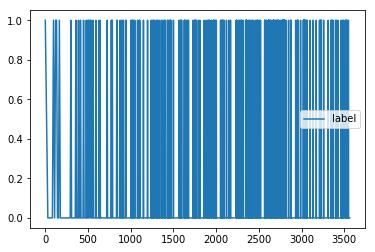

In [256]:
peopleConverted.set_index("person").loc[idx].reset_index().drop_duplicates(subset="person").plot()

In [217]:
peopleConverted[peopleConverted.person == "a2242e99"]

person  label
26676   a2242e99    0.0
45513   a2242e99    0.0
64898   a2242e99    0.0
77748   a2242e99    0.0
79570   a2242e99    0.0
96743   a2242e99    0.0
117707  a2242e99    0.0
129373  a2242e99    0.0
131542  a2242e99    0.0
131860  a2242e99    0.0
136142  a2242e99    0.0
750226  a2242e99    0.0
750732  a2242e99    0.0